In [1]:
import pandas as pd
import seaborn as sns


In [45]:
df=pd.read_csv('healthcare-dataset-stroke-data.csv')
df1=df
df.head(5)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [3]:
from sklearn.preprocessing import LabelEncoder

In [4]:
labelencoder= LabelEncoder()

In [5]:
df['gender']=labelencoder.fit_transform(df['gender'])
df.head(2)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,0,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1


In [6]:
# df['smoking_status'].value_counts()
df['smoking_status'].nunique()

4

In [7]:
df['smoking_status']=labelencoder.fit_transform(df['smoking_status'])
df.head(2)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,67.0,0,1,Yes,Private,Urban,228.69,36.6,1,1
1,51676,0,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,2,1


In [8]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [9]:
df['bmi'].describe()

count    4909.000000
mean       28.893237
std         7.854067
min        10.300000
25%        23.500000
50%        28.100000
75%        33.100000
max        97.600000
Name: bmi, dtype: float64

In [10]:
df['Residence_type'].nunique()

2

In [11]:
df['Residence_type']=labelencoder.fit_transform(df['Residence_type'])
df.head(2)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,67.0,0,1,Yes,Private,1,228.69,36.6,1,1
1,51676,0,61.0,0,0,Yes,Self-employed,0,202.21,NaN,2,1


In [12]:
df.drop(['ever_married','work_type','bmi','id'],axis=1,inplace=True)
df.head()

,gender,age,hypertension,heart_disease,Residence_type,avg_glucose_level,smoking_status,stroke
0,1,67.0,0,1,1,228.69,1,1
1,0,61.0,0,0,0,202.21,2,1
2,1,80.0,0,1,0,105.92,2,1
3,0,49.0,0,0,1,171.23,3,1
4,0,79.0,1,0,0,174.12,2,1


In [13]:
x=df.drop(['stroke'],axis=1)
x.head(2)

,gender,age,hypertension,heart_disease,Residence_type,avg_glucose_level,smoking_status
0,1,67.0,0,1,1,228.69,1
1,0,61.0,0,0,0,202.21,2


In [14]:
y=df['stroke']
y.head(2)

0    1
1    1
Name: stroke, dtype: int64

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [17]:
from sklearn.linear_model import LogisticRegression

In [18]:
logmodel=LogisticRegression()

In [19]:
logmodel.fit(x_train,y_train)

C:\Users\saumy\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [20]:
logmodel.predict([[1,67,0,1,1,230,1]])

array([0], dtype=int64)

In [21]:
logmodel.score(x,y)

0.9512720156555773

In [22]:
from sklearn.model_selection import cross_val_score

In [23]:
cross_val_score(LogisticRegression(solver='liblinear',multi_class='ovr'),x,y,cv=5)

array([0.95107632, 0.95107632, 0.95107632, 0.95107632, 0.95205479])

In [24]:
from sklearn.svm import SVC
cross_val_score(SVC(gamma='auto'),x,y,cv=5)

array([0.95009785, 0.95107632, 0.95107632, 0.95107632, 0.95107632])

In [25]:
from sklearn.ensemble import RandomForestClassifier

In [26]:
cross_val_score(RandomForestClassifier(n_estimators=40),x,y,cv=5)

array([0.94422701, 0.94716243, 0.94422701, 0.94422701, 0.94422701])

In [27]:
# from sklearn import svm
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.linear_model import LogisticRegression
# from sklearn.model_selection import GridSearchCV

# model_params = {
#     'svm': {
#         'model': svm.SVC(gamma='auto'),
#         'params' : {
#             'C': [1,10,20],
#             'kernel': ['rbf','linear']
#         }  
#     },
#     'random_forest': {
#         'model': RandomForestClassifier(),
#         'params' : {
#             'n_estimators': [1,5,10]
#         }
#     },
#     'logistic_regression' : {
#         'model': LogisticRegression(solver='liblinear',multi_class='auto'),
#         'params': {
#             'C': [1,5,10]
#         }
#     }
# }

In [28]:
# scores = []

# for model_name, mp in model_params.items():
#     clf =  GridSearchCV(mp['model'], mp['params'], cv=2, return_train_score=False)
#     clf.fit(x_train, y_train)
#     scores.append({
#         'model': model_name,
#         'best_score': clf.best_score_,
#         'best_params': clf.best_params_
#     })
    
# df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
# df

In [29]:
df1.head()

,gender,age,hypertension,heart_disease,Residence_type,avg_glucose_level,smoking_status,stroke
0,1,67.0,0,1,1,228.69,1,1
1,0,61.0,0,0,0,202.21,2,1
2,1,80.0,0,1,0,105.92,2,1
3,0,49.0,0,0,1,171.23,3,1
4,0,79.0,1,0,0,174.12,2,1


In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

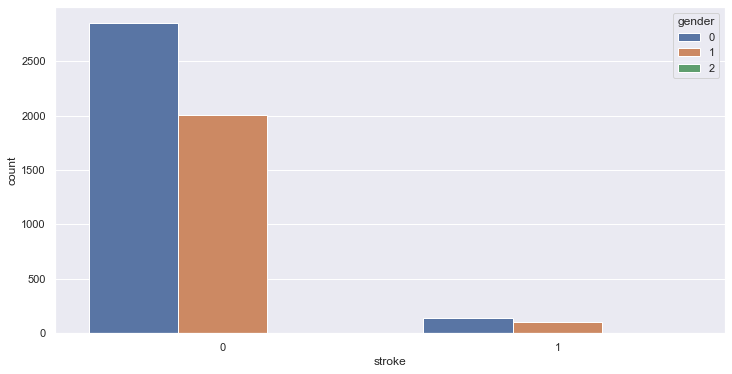

In [31]:
sns.set(rc={'figure.figsize':(12,6)})
sns.countplot(data=df1,x='stroke',hue='gender')


In [32]:
df['gender'].value_counts()

0    2994
1    2115
2       1
Name: gender, dtype: int64

In [33]:
rural_stroke_count=df[(df['Residence_type']=='Rural') & (df['stroke']==1)]

C:\Users\saumy\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


In [34]:
print(len(rural_stroke_count))

0


In [35]:
Urban_stroke_count=df[(df['Residence_type']=='Urban') & (df['stroke']==1)]


In [36]:
print(len(Urban_stroke_count))

0


In [37]:
df['smoking_status'].value_counts()


2    1892
0    1544
1     885
3     789
Name: smoking_status, dtype: int64

In [38]:
p=df[(df['smoking_status']!='never smoked')&(df['stroke']==1)]

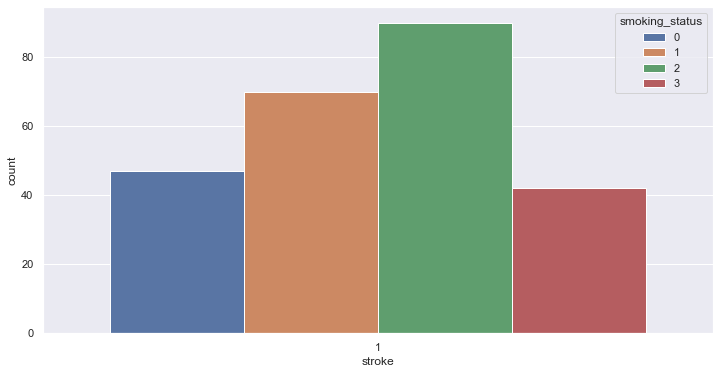

In [39]:
sns.countplot(data=p,x='stroke',hue='smoking_status')

In [40]:
# sns.displot(data=tips, x="total_bill", col="time", kde=True)

In [41]:
q=df[df['stroke']==1]

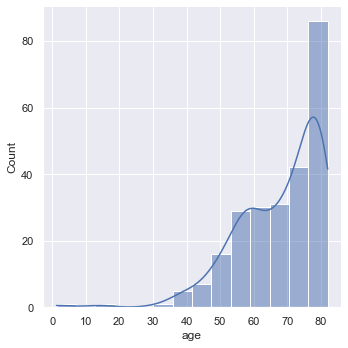

In [42]:
sns.displot(data=q, x="age", kde=True)

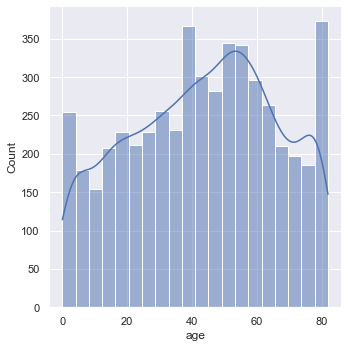

In [43]:
sns.displot(data=df, x="age", kde=True)

In [46]:
df1['work_type'].unique()

array(['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked'],
      dtype=object)

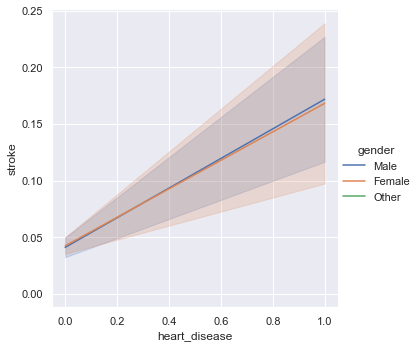

In [47]:
sns.relplot(
    data=df1, kind="line",
    x="heart_disease", y="stroke",
    hue="gender"
)


In [48]:
df1.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [49]:
m=df[df1['stroke']==1]
n=df[df1['stroke']!=1]
    
    

In [50]:
# m['bmi'].mean()
m['bmi'].isnull().sum()

40

In [51]:
n['bmi'].mean()

28.823063829787245

In [52]:
stroke=df['stroke']


In [ ]:
# m['bmi'].fillna(30.47,inplace=True)

In [ ]:
# m['bmi'].isnull().sum()

In [ ]:
# n['bmi'].fillna(28,inplace=True)

In [ ]:
# df[(df['stroke']==1)&(df['bmi'].isnull())].fillna(30.47,inplace=True)

# n=m=df[(df['stroke']==0)&(df['bmi'].isnull())]

In [ ]:
# df[(df['stroke']==0)&(df['bmi'].isnull())].fillna(28,inplace=True)

In [53]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [54]:
meanbmi=df['bmi'].mean()

In [55]:
df['bmi'].fillna(meanbmi,inplace=True)

In [56]:
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [57]:
df.head(2)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1


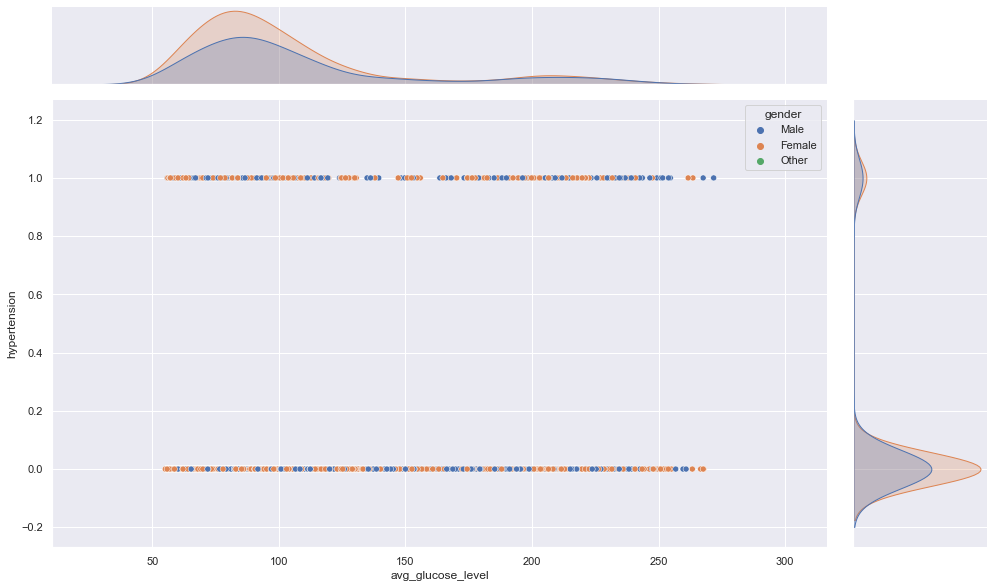

In [58]:
g=sns.jointplot(data=df1, x="avg_glucose_level", y="hypertension", hue="gender")
g.fig.set_figwidth(15.27)
g.fig.set_figheight(8.7)

In [ ]:
# sns.pairplot(data=df1, hue="gender")

In [59]:
df1.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


In [60]:
import matplotlib.pyplot as plt

In [63]:
# plt.scatter(x="age",y="avg_glucose_level",linewidth=2,marker='*')